## Growth and Development from APPL 10-K
The Company invests in tools and resources that support employees’ individual growth and development. 

The Company also 
provides **classes** and seminars to foster understanding and critical thinking about the Company’s culture, organization and 
values.

In [1]:
# import panel as pn
# pn.extension()

In [2]:
import bokeh
# bokeh.sampledata.download()

In [3]:
import panel as pn
import pandas as pd
from matplotlib.figure import Figure
# not needed for mpl >= 3.1
from matplotlib.backends.backend_agg import FigureCanvas

from bokeh.sampledata import stocks

pn.extension(sizing_mode="stretch_width")

In [4]:
title = '## Stock Explorer Matplotlib'

tickers = ['AAPL', 'FB', 'GOOG', 'IBM', 'MSFT']

def get_df(ticker, window_size):
    df = pd.DataFrame(getattr(stocks, ticker))
    df['date'] = pd.to_datetime(df.date)
    return df.set_index('date').rolling(window=window_size).mean().reset_index()

def get_plot(ticker, window_size):
    fig = Figure(figsize=(10, 6))
    ax = fig.subplots()
    FigureCanvas(fig)  # not needed for mpl >= 3.1
    df = get_df(ticker, window_size)
    df.plot.line('date', 'close', ax=ax)
    return fig

Row(sizing_mode='stretch_width')
    [0] Column(sizing_mode='fixed', width=300)
        [0] Column(margin=5, name='StockExplorer', sizing_mode='stretch_width', width=300)
            [0] StaticText(sizing_mode='stretch_width', value='<b>StockExplorer</b>')
            [1] Select(name='Ticker', options=OrderedDict([('AAPL', ...]), sizing_mode='stretch_width', value='AAPL')
            [2] IntSlider(end=21, name='Window size', sizing_mode='stretch_width', start=1, value=6)
    [1] ParamMethod(method, sizing_mode='stretch_width')
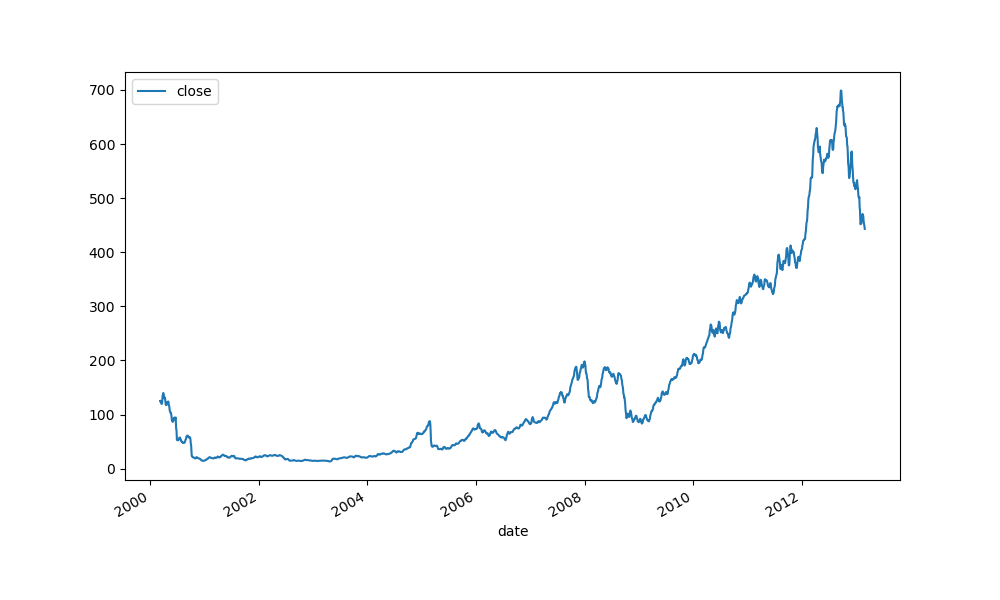

In [5]:
import param

class StockExplorer(param.Parameterized):
    
    ticker = param.Selector(default='AAPL', objects=tickers)
    
    window_size = param.Integer(default=6, bounds=(1, 21))
    
    @param.depends('ticker', 'window_size')
    def plot(self):
        return get_plot(self.ticker, self.window_size)
    
explorer = StockExplorer()
pn.Row(pn.Column(explorer.param, sizing_mode="fixed", width=300), explorer.plot)